In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("Data-Toronto-Police.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5707 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5707 non-null   float64
 1   Y                  5707 non-null   float64
 2   OBJECTID           5707 non-null   int64  
 3   EVENT_UNIQUE_ID    5707 non-null   object 
 4   OCC_DATE           5707 non-null   object 
 5   OCC_YEAR           5707 non-null   int64  
 6   OCC_MONTH          5707 non-null   object 
 7   OCC_DOW            5707 non-null   object 
 8   OCC_DOY            5707 non-null   int64  
 9   OCC_DAY            5707 non-null   int64  
 10  OCC_HOUR           5707 non-null   int64  
 11  OCC_TIME_RANGE     5707 non-null   object 
 12  DIVISION           5707 non-null   object 
 13  DEATH              5707 non-null   int64  
 14  INJURIES           5707 non-null   int64  
 15  HOOD_158           5707 non-null   object 
 16  NEIGHBOURHOOD_158  5707 

In [3]:
lat_unknown = df[df['LONG_WGS84'] < -85]
# lat_unknown[['DEATH', 'INJURIES']]
lat_unknown[lat_unknown['INJURIES'] == 1].count()[0]
# Number of injuries in the unknown place events

38

Since there are only sixty events of unknown location, drop these

In [41]:
# df_noout = df[df['Y'] != 0.0]
df_noout = df[~df.isin(['NSA'])].dropna()
df_noout.info()
if 'NSA' in df.values:
    print("yes")
    if 'NSA' not in df_noout.values:
        print("NSA entries are eliminated")
df_noout = df_noout.reset_index(drop=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5641 entries, 0 to 5706
Data columns (total 21 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   X                  5641 non-null   float64
 1   Y                  5641 non-null   float64
 2   OBJECTID           5641 non-null   int64  
 3   EVENT_UNIQUE_ID    5641 non-null   object 
 4   OCC_DATE           5641 non-null   object 
 5   OCC_YEAR           5641 non-null   int64  
 6   OCC_MONTH          5641 non-null   object 
 7   OCC_DOW            5641 non-null   object 
 8   OCC_DOY            5641 non-null   int64  
 9   OCC_DAY            5641 non-null   int64  
 10  OCC_HOUR           5641 non-null   int64  
 11  OCC_TIME_RANGE     5641 non-null   object 
 12  DIVISION           5641 non-null   object 
 13  DEATH              5641 non-null   int64  
 14  INJURIES           5641 non-null   int64  
 15  HOOD_158           5641 non-null   object 
 16  NEIGHBOURHOOD_158  5641 

Check the range of inputs, make sure the values are valid

In [5]:
print("hour min: ", df_noout['OCC_HOUR'].min(), " max: ", df_noout['OCC_HOUR'].max())
print("DOY min: ", df_noout['OCC_DOY'].min(), " max: ", df_noout['OCC_DOY'].max())

hour min:  0  max:  23
DOY min:  1  max:  366


To make suggestion to an insuarnce company, the dataset needs to be seperated by regions, put regions in a dictionary, and calculate each year's total event, death rate, and injure rate. Show them 

In [6]:
GROUPED_158 = df_noout.groupby('HOOD_158')
GROUPED_140 = df_noout.groupby('HOOD_140')

dict_158 = dict(list(GROUPED_158))
dict_140 = dict(list(GROUPED_140))



In [7]:
print(df['OCC_YEAR'].unique())

[2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015 2016 2017
 2018 2019 2020 2021 2022]


Find the event number, death rate, injure rate for each community for each year.

In [8]:
print(dict_158['2'].count())
print(df['HOOD_140'].unique())

X                    192
Y                    192
OBJECTID             192
EVENT_UNIQUE_ID      192
OCC_DATE             192
OCC_YEAR             192
OCC_MONTH            192
OCC_DOW              192
OCC_DOY              192
OCC_DAY              192
OCC_HOUR             192
OCC_TIME_RANGE       192
DIVISION             192
DEATH                192
INJURIES             192
HOOD_158             192
NEIGHBOURHOOD_158    192
HOOD_140             192
NEIGHBOURHOOD_140    192
LONG_WGS84           192
LAT_WGS84            192
dtype: int64
['137' '1' '24' '75' '132' '45' '131' '2' '85' 'NSA' '113' '124' '111'
 '72' '126' '136' '5' '118' '28' '117' '58' '76' '73' '120' '70' '27' '77'
 '84' '78' '43' '74' '134' '23' '50' '93' '107' '26' '83' '108' '25' '54'
 '16' '29' '30' '18' '14' '138' '17' '32' '8' '59' '130' '4' '128' '121'
 '89' '44' '110' '135' '40' '48' '104' '87' '13' '88' '31' '127' '139'
 '92' '91' '97' '61' '123' '57' '53' '90' '47' '109' '116' '21' '65' '122'
 '11' '71' '82' '7' '38

In [9]:
# dictionary: keys are string of numbers, values are dataframes
# event_count, death_rate and injury_rate: both dictionary of dictionary. death_rate[first][second], first is the hood number in string, second is
#   number of year in string, value is a float or int.
# dict<string, <string, int>> event_count, change the int to float for the other two dicts.

def calc_rates(dictionary):
    event_count = {}
    death = 0
    injury = 0
    death_rate = {}
    injury_rate = {}
    for key in dictionary.keys():
        # loop through dataframe of each hood
        neighbor = dictionary[key] # dataframe
        # initialize the looped dictionaries
        event_count[key] = {}
        death_rate[key] = {}
        injury_rate[key] = {}
        for i in range(2004, 2023):
            # loop through years
            event_count[key][i] = neighbor[neighbor['OCC_YEAR'] == i].count()[0]
            death = neighbor[neighbor['OCC_YEAR'] == i]['DEATH'].sum()
            injury = neighbor[neighbor['OCC_YEAR'] == i]['INJURIES'].sum()
            # death = neighbor[(neighbor['DEATH'] == 1) & (neighbor['OCC_YEAR'] == str(i))].count()[0]
            # injury = neighbor[(neighbor['INJURIES'] == 1) & (neighbor['OCC_YEAR'] == str(i))].count()[0]
            if(event_count[key][i] == 0):
                death_rate[key][i] = 0.0
                injury_rate[key][i] = 0.0
            else:
                death_rate[key][i] = death/event_count[key][i]
                injury_rate[key][i] = injury/event_count[key][i]
    return event_count, death_rate, injury_rate
        



In [10]:
neighbor = dict_140['85']
# print(neighbor['OCC_YEAR'] == 2004)
print(neighbor[neighbor['OCC_YEAR'] == 2004]['INJURIES'])

8      0
69     1
108    0
Name: INJURIES, dtype: int64


In [11]:
event_count_140, death_rate_140, injury_rate_140 = calc_rates(dict_140)

In [12]:
event_count_158, death_rate_158, injury_rate_158 = calc_rates(dict_158)

Plot the 

In [13]:
print(death_rate_140['85'].keys())

dict_keys([2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022])


In [14]:
total_event_per_hood_140 = {}
for key in event_count_140.keys():
    total_event_per_hood_140[key] = sum(event_count_140[key].values())

total_event_per_hood_158 = {}
for key in event_count_158.keys():
    total_event_per_hood_158[key] = sum(event_count_158[key].values())


(2004.0, 2022.0)

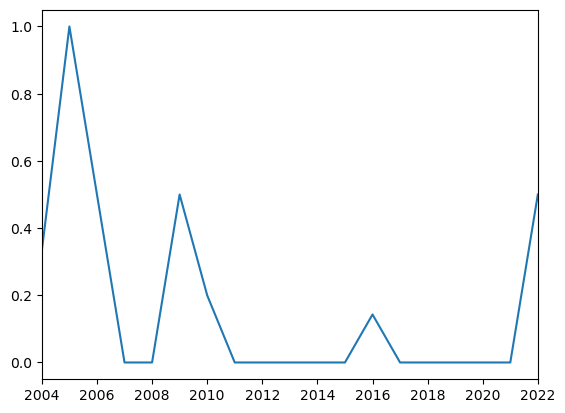

In [15]:
sns.lineplot(x = death_rate_140['85'].keys(), y = death_rate_140['85'].values())
plt.xlim(2004, 2022)

In [16]:
from shapely.geometry import Point, Polygon

In [17]:
# Polygon list
def is_vertex_inside_polygon(polygon_list, vertex):
    for i in range(len(polygon_list)):
        polygon = Polygon(polygon_list[i])
        point = Point(vertex)
        if(polygon.contains(point)): return i
        else: continue
    
    return -1

# check if a vertex lies in a polygon
# def is_vertex_inside_polygon(polygon_vertices, vertex):
#     polygon = Polygon(polygon_vertices)
#     point = Point(vertex)
    
#     return polygon.contains(point)

In [18]:
print(df_noout['Y'].describe())

count    5645.000000
mean       43.719096
std         0.048916
min        43.587343
25%        43.678879
50%        43.721362
75%        43.755542
max        43.838273
Name: Y, dtype: float64


In [19]:
geo = pd.read_csv('Former Municipality Boundaries Data.csv')
geo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6 entries, 0 to 5
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   _id              6 non-null      int64  
 1   AREA_ID          6 non-null      int64  
 2   DATE_EFFECTIVE   0 non-null      float64
 3   AREA_ATTR_ID     6 non-null      int64  
 4   PARENT_AREA_ID   6 non-null      int64  
 5   AREA_SHORT_CODE  6 non-null      int64  
 6   AREA_LONG_CODE   6 non-null      int64  
 7   AREA_NAME        6 non-null      object 
 8   AREA_DESC        6 non-null      object 
 9   OBJECTID         6 non-null      int64  
 10  geometry         6 non-null      object 
dtypes: float64(1), int64(7), object(3)
memory usage: 656.0+ bytes


In [20]:
import json

In [21]:
polygons = []
for i in range(0, 6):
    geo0 = geo['geometry'][i]
    js_string = json.dumps(geo0)
    parsed_object = json.loads(js_string)
    js_dict = eval(parsed_object)
    a = np.array(js_dict['coordinates'])
    polygon_vertices = a[0][0]
    polygons.append(polygon_vertices)
print("We have ", len(polygons), " region-polygons in total.")


We have  6  region-polygons in total.


In [22]:
# geo0 = geo['geometry'][0]

In [23]:
# js_string = json.dumps(geo0)
# parsed_object = json.loads(js_string)


In [24]:
# print(parsed_object)

In [25]:
# js_dict = eval(parsed_object)
# a = np.array(js_dict['coordinates'])
# print(a.shape)
# polygon_vertices = a[0][0]
# # vertices = parsed_object["coordinates"]
# print(polygon_vertices.shape)

In [43]:

df_noout['Y'][9]

43.76258324

In [44]:
hood_vertices = []
for i in range(0, len(df_noout['X'])):
    hood_vertices.append([df_noout['X'][i], df_noout['Y'][i]])
print(len(hood_vertices))

5641


In [45]:
print(hood_vertices[0])

[-79.23495526, 43.78152799]


In [46]:
category = []
for i in range(0, len(hood_vertices)):
    category.append(is_vertex_inside_polygon(polygons, hood_vertices[i])) 
print(category[:20])

[3, 4, 1, 5, 3, 1, 3, 4, 5, 1, 4, 0, 3, 0, 5, 3, 3, 4, 0, 5]


In [50]:
df_noout['Region'] = category
df_noout.to_csv('output.csv', index=False)